In [37]:
# 所需 的 含式庫
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
# ########################################

In [38]:
# 所需 的 含式庫
from ucimlrepo import fetch_ucirepo
# ########################################
# 抓取 原始資料
adult = fetch_ucirepo(id=2) 
rawX = adult.data.features.copy()
rawY = adult.data.targets.copy()
print('原始資料大小(x/y)：',rawX.shape,rawY.shape)

原始資料大小(x/y)： (48842, 14) (48842, 1)


In [39]:
# 所有特徵
Feature = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race'
            ,'sex','capital-gain','capital-loss','hours-per-week','native-country']

In [40]:
# 預處理 1
import pandas as pd
# ########################################################
tempX,tempY = rawX.copy(),rawY.copy()
# ########################################################
# 消掉 ? 和 NaN
# X：
for col in Feature:
    try:
        tempY = tempY[~(tempX[col]=='?')]
        tempX = tempX[~(tempX[col]=='?')]
        tempY = tempY[~(tempX.isna().any(axis=1))]
        tempX = tempX[~(tempX.isna().any(axis=1))]
    except:
        pass
# ########################################################
# Y：
tempY.loc[tempY['income'] == '>50K.'] = '>50K'
tempY.loc[tempY['income'] == '<=50K.'] = '<=50K'
# ########################################################
print('原始資料大小(x/y)：',tempX.shape,tempY.shape)
X0,Y0 = tempX.copy(),tempY.copy()

原始資料大小(x/y)： (45222, 14) (45222, 1)


In [41]:
# 教育年級
education = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'
    ,'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Doctorate','Prof-school']

In [42]:
# 預處理 2
# ########################################################
tempX,tempY = X0.copy(),Y0.copy();
# ########################################################
# 特徵資料處理
temp_x = {}
for feature in Feature:
    match feature:
        case 'age':
            temp_x.update({feature:tempX[feature]})
            
        case 'workclass':
            tempX[feature], _ = pd.factorize(tempX[feature])
            temp_x.update({feature:tempX[feature]})

        case 'fnlwgt':
            list_ = np.array(tempX[feature])
            _range = np.max(list_) - np.min(list_)
            out = (list_ - np.min(list_)) / _range
            out = out.tolist()
            temp_x.update({feature:out})

        case 'education':
            temp = tempX[feature].tolist().copy()
            temp = np.array(temp)
            for num,grade in enumerate(education):
                temp[temp == grade] = num
                # X[feature][X[feature] == grade] = num
            
            temp_x.update({feature:temp.tolist()})

        case 'education-num':
            temp_x.update({feature:tempX[feature]})

        case 'marital-status':
            tempX[feature], _ = pd.factorize(tempX[feature])
            temp_x.update({feature:tempX[feature]})

        case 'occupation':
            tempX[feature], _ = pd.factorize(tempX[feature])
            temp_x.update({feature:tempX[feature]})

        case 'relationship':
            tempX[feature], _ = pd.factorize(tempX[feature])
            temp_x.update({feature:tempX[feature]})

        case 'race':
            tempX[feature], _ = pd.factorize(tempX[feature])
            temp_x.update({feature:tempX[feature]})

        case 'sex':
            tempX[feature], _ = pd.factorize(tempX[feature])
            temp_x.update({feature:tempX[feature]})

        case 'capital-gain':
            list_ = np.array(tempX[feature])
            _range = np.max(list_) - np.min(list_)
            out = (list_ - np.min(list_)) / _range
            out = out.tolist()
            temp_x.update({feature:out})

        case 'capital-loss':
            list_ = np.array(tempX[feature])
            _range = np.max(list_) - np.min(list_)
            out = (list_ - np.min(list_)) / _range
            out = out.tolist()
            temp_x.update({feature:out})

        case 'hours-per-week':
            list_ = np.array(tempX[feature])
            _range = np.max(list_) - np.min(list_)
            out = (list_ - np.min(list_)) / _range
            out = out.tolist()
            temp_x.update({feature:out})

        case 'native-country':
            A, _ = pd.factorize(tempX[feature])
            temp_x.update({feature:A})

# #####################################################
tempX = pd.DataFrame(temp_x)
print(tempX['age'])
tempy, _ = pd.factorize(tempY['income'])
tempY = pd.DataFrame({'income':tempy.tolist()})
# #####################################################
X1,Y1 = tempX.copy(),tempY.copy();
print(X1.dtypes,Y1.dtypes)

0        39
1        50
2        38
3        53
4        28
         ..
48836    33
48837    39
48839    38
48840    44
48841    35
Name: age, Length: 45222, dtype: int64
age                 int64
workclass           int64
fnlwgt            float64
education          object
education-num       int64
marital-status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country      int64
dtype: object income    int64
dtype: object


In [43]:
# 特徵選擇
Feature_selection = ['age','workclass','fnlwgt','education','marital-status','occupation','relationship','race'
            ,'sex','capital-gain','capital-loss','hours-per-week','native-country']

In [44]:
# 預處理 3
# ########################################################
tempX,tempY = X1.copy(),Y1.copy();
# ########################################################
# 特徵選擇
temp = {}
for feature in Feature_selection:
    temp.update({feature:tempX[feature].tolist()})
tempX = pd.DataFrame(temp)
# ########################################################
X2,Y2 = tempX.copy(),tempY.copy();
print(X2.shape,Y2.shape)

(45222, 13) (45222, 1)


C:\Users\Ming Hong\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Ming Hong\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Ming Hong\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Ming Hong\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and

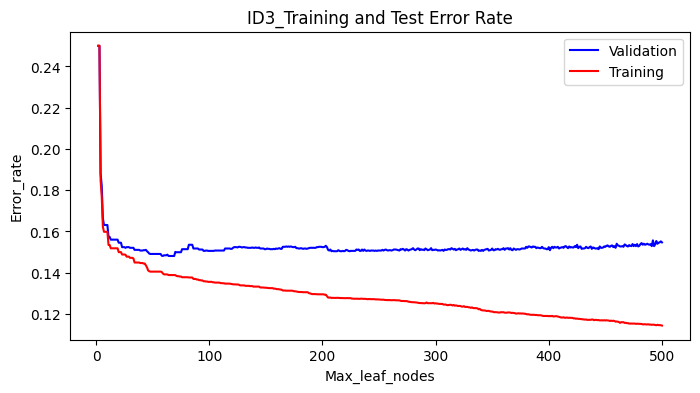

In [53]:
# ID3 決策樹
# ########################################################
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
tempX,tempY = X2.copy(),Y2.copy();
# ########################################################
# 設定 Validation set 和 Test set 的 比例
testsize,verifysize = 0.33,0.2
max_node = 500
# ########################################################
# 分出 Training set ,Validation set ,Test set
X_train, X_test, y_train, y_test = train_test_split(tempX, tempY, test_size = testsize, random_state = 0);
X_train, X_verify, y_train, y_verify = train_test_split(X_train, y_train, test_size = verifysize, random_state = 0);
# ########################################################
Training_error_rate,Validation_error_rate = {},{};
Error_rate_point = [100.0,0];
for node in range(2, max_node + 1):
    # 創建ID3決策樹模型
    model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=node);
    # # 訓練模型
    model.fit(X_train, y_train);
    # Training set 的 測試 錯誤率
    training_error_rate = 1 - model.score(X_train, y_train)
    Training_error_rate[node] = training_error_rate;
    # Validation set 的 測試 錯誤率
    validation_error_rate = 1 - model.score(X_verify, y_verify)
    Validation_error_rate[node] = validation_error_rate;
    # 判斷是否為 錯誤率 最小值 並存下 位置
    if Error_rate_point[0] > validation_error_rate:
        Error_rate_point[0] = validation_error_rate.copy();
        Error_rate_point[1] = node;
model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = Error_rate_point[1]).fit(X_train, y_train);
Test_error_rate = 1 - model.score(X_test, y_test)
# 繪製圖表
fig = plt.figure(figsize=(8,4))
fig.add_subplot(1,1,1)
plt.plot(Validation_error_rate.keys(), Validation_error_rate.values(),color = 'b',label = 'Validation')
plt.plot(Training_error_rate.keys(), Training_error_rate.values(),color = 'r',label = 'Training')
plt.xlabel('Max_leaf_nodes');plt.ylabel("Error_rate");
plt.title('ID3_Training and Test Error Rate');
plt.legend();
plt.show();

In [55]:
print('[最低驗證錯誤率,位置]：',Error_rate_point)
print('驗證成功率:',1 - Error_rate_point[0])
print('測試成功率:',1 - Test_error_rate)

[最低驗證錯誤率,位置]： [0.14801980198019804, 59]
驗證成功率: 0.851980198019802
測試成功率: 0.8549316537121415
